## Move correct folder

In [9]:
%cd data_generation

[Errno 2] No such file or directory: 'data_generation'
/mnt/d/deepface-video-recognition/data_generation


## IMPORT LIB

In [10]:
from deepface import DeepFace
from concurrent.futures import ThreadPoolExecutor

import os
import pickle
import numpy as np
import faiss
import queue
import threading
import cv2
import matplotlib.pyplot as plt

## Search shot file from index

In [11]:
chosen_face_det = "fastmtcnn"
chosen_character = "Byrd"
chosen_emb_model = "GhostFaceNet"
chosen_movie = "Calloused_Hands"
chosen_avatar_emb_path = f"../character_emb_query/{chosen_movie}/{chosen_emb_model}/{chosen_character}/{chosen_character}_1.pkl"
faiss_index_emb_path = f"../faiss_index/{chosen_movie}/{chosen_emb_model}/movie_{chosen_movie}-det_{chosen_face_det}-emb_{chosen_emb_model}.pkl"
read_files_emb_path = f"../faiss_index/{chosen_movie}/{chosen_emb_model}/read-movie_{chosen_movie}-det_{chosen_face_det}-emb_{chosen_emb_model}.pkl"
k_relevant = 10
print('chosen_avatar_emb_path:', chosen_avatar_emb_path, 'faiss_index_emb_path:', faiss_index_emb_path, 'read_files_emb_path:', read_files_emb_path)
with open(chosen_avatar_emb_path, "rb") as f:
    query_embedding = pickle.load(f)
with open(read_files_emb_path, "rb") as f:
    read = pickle.load(f)

index = faiss.read_index(faiss_index_emb_path)
print(index.ntotal, len(read))


chosen_avatar_emb_path: ../character_emb_query/Calloused_Hands/GhostFaceNet/Byrd/Byrd_1.pkl faiss_index_emb_path: ../faiss_index/Calloused_Hands/GhostFaceNet/movie_Calloused_Hands-det_fastmtcnn-emb_GhostFaceNet.pkl read_files_emb_path: ../faiss_index/Calloused_Hands/GhostFaceNet/read-movie_Calloused_Hands-det_fastmtcnn-emb_GhostFaceNet.pkl


17691 17691


In [12]:
def extract_unique_names(filenames: list):
    # Extract unique prefixes
    unique_prefixes = set()
    for filename in filenames:
        prefix = filename.split("-frame_")[0]
        unique_prefixes.add(prefix)

    # Convert the set to a list if needed
    unique_list = list(unique_prefixes)

    return unique_list

In [13]:
def show_img(img_path):
    print(img_path)
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [14]:
distances, indices = index.search(query_embedding, k=k_relevant)

In [15]:
def show_detected_faces(model, indices, read, chosen_avatar_emb_path):
    chosen_avatar_path = chosen_avatar_emb_path.replace("character_emb_query", "character_query").replace("pkl", "jpg").replace(f"-emb_{model}-", "-").replace(f"/{chosen_emb_model}/", "/")
    show_img(chosen_avatar_path)
    for i in indices[0]:
        pickle_file_path = read[i]
        # print(pickle_file_path)
        image_path = pickle_file_path.replace("faces_emb", "faces").replace("pkl", "jpg").replace(f"-emb_{model}", "")
        show_img(image_path)
        # print(image_path)

../character_query/Calloused_Hands/Byrd/Byrd_1.jpg


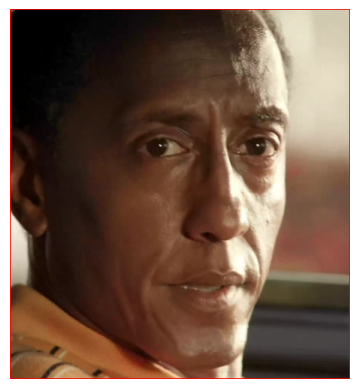

../faces/Calloused_Hands/Calloused_Hands-1/Calloused_Hands-1-shot_1/Calloused_Hands-1-shot_1-frame_20-det_fastmtcnn-face_1.jpg


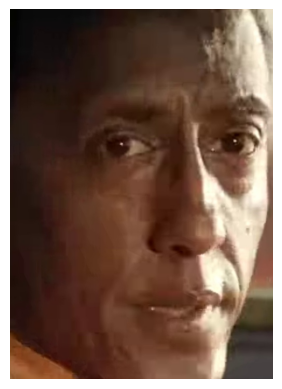

../faces/Calloused_Hands/Calloused_Hands-1/Calloused_Hands-1-shot_8/Calloused_Hands-1-shot_8-frame_140-det_fastmtcnn-face_2.jpg


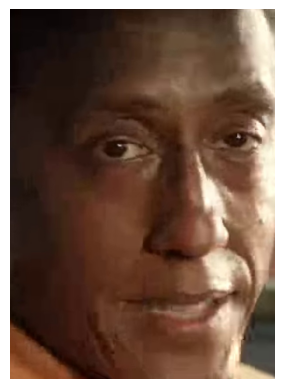

../faces/Calloused_Hands/Calloused_Hands-1/Calloused_Hands-1-shot_6/Calloused_Hands-1-shot_6-frame_100-det_fastmtcnn-face_2.jpg


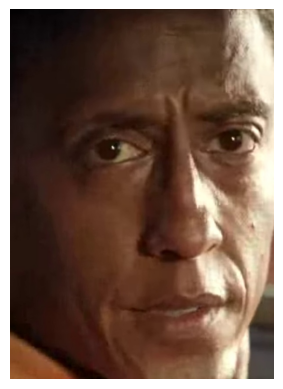

../faces/Calloused_Hands/Calloused_Hands-1/Calloused_Hands-1-shot_6/Calloused_Hands-1-shot_6-frame_04-det_fastmtcnn-face_1.jpg


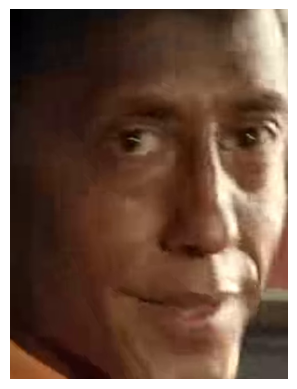

../faces/Calloused_Hands/Calloused_Hands-1/Calloused_Hands-1-shot_12/Calloused_Hands-1-shot_12-frame_88-det_fastmtcnn-face_1.jpg


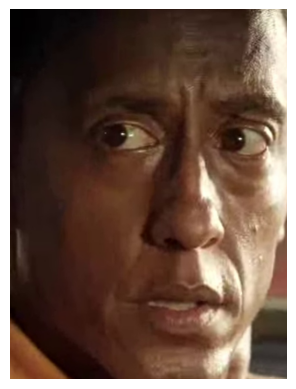

../faces/Calloused_Hands/Calloused_Hands-1/Calloused_Hands-1-shot_8/Calloused_Hands-1-shot_8-frame_136-det_fastmtcnn-face_2.jpg


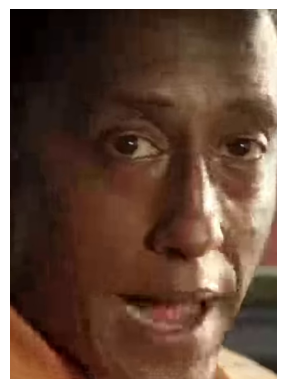

../faces/Calloused_Hands/Calloused_Hands-1/Calloused_Hands-1-shot_12/Calloused_Hands-1-shot_12-frame_96-det_fastmtcnn-face_1.jpg


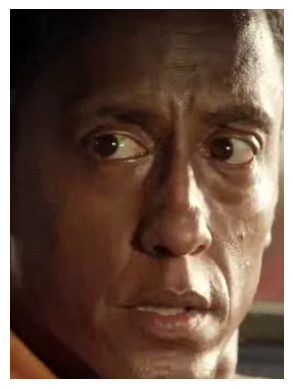

../faces/Calloused_Hands/Calloused_Hands-1/Calloused_Hands-1-shot_12/Calloused_Hands-1-shot_12-frame_64-det_fastmtcnn-face_1.jpg


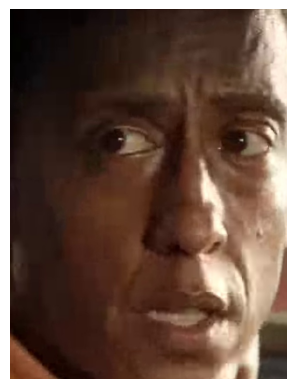

../faces/Calloused_Hands/Calloused_Hands-1/Calloused_Hands-1-shot_3/Calloused_Hands-1-shot_3-frame_124-det_fastmtcnn-face_1.jpg


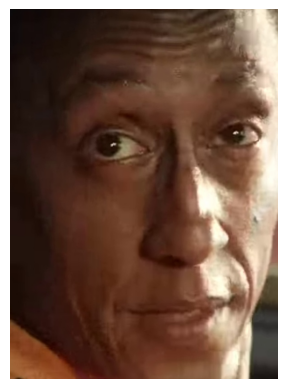

../faces/Calloused_Hands/Calloused_Hands-1/Calloused_Hands-1-shot_6/Calloused_Hands-1-shot_6-frame_32-det_fastmtcnn-face_2.jpg


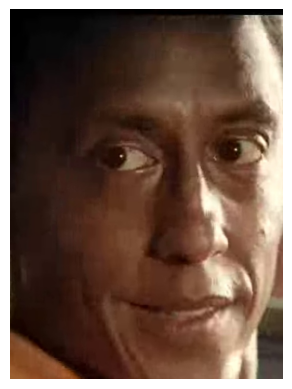

In [16]:
show_detected_faces(chosen_emb_model, indices, read, chosen_avatar_emb_path)